# 19720959     Cameron Carton     Youtube API

In [318]:
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np
import datetime
now = datetime.datetime.now()

# Reading in data file

In [319]:
# reading in the csv file with the data
df = pd.read_csv('youtubeData.csv')

# Cleaning up data in file
storing as a pandas dataframe

In [320]:
# clean up data
# cleaning up names
names_dirty = df.Names.to_list()
for x in names_dirty:
    name = x[2:]
    name = name[:-1]
    df['Names'].replace(x,name,inplace=True)
    
#cleaning up dates
date_dirty = df.Date.to_list()
for x in date_dirty:
    date = x
    while len(date) > 10:
        date = date[:-1]
    df['Date'].replace(x,date,inplace=True)

# Data Verification
making sure the dataframe has stored the data correctly

In [321]:
# checking format
df.head()

,Names,Subscribers,Views,Videos,id,Date
0,ARVEA Nature,10600,1209912,147,UCMVqZzwV8HE5zWvsQ2hCXeA,2018-08-02
1,Nature Hacker,1480,131203,4,UCunXbc8O0-EfLBc8bI0n44A,2019-07-19
2,Nature Foundation at Wintergreen,65,21149,92,UCDcYM2jhUBl1mbKBJlRw97w,2018-06-20
3,Immerse In Nature,87000,21528346,33,UCFSAVaGPkRVzWycr96-XZVQ,2017-08-19
4,Nature of Dhamma,1720,33866,71,UCFxG4FDBlWYQNZrLJ1kKOSQ,2021-05-04


In [322]:
df.tail()

,Names,Subscribers,Views,Videos,id,Date
450,Natures Voice,148000,17965654,562,UCRpqEYRo8-AAOj8kVrTud0w,2016-02-16
451,Ni\xc3\xb1os & Nature,282,6147,19,UCG19ezhMTwoBsCphgVG6rzg,2020-06-30
452,Crazy Nature,311,397660,7,UCS8EiQe-VeuQf_TzhRwLJvA,2020-06-23
453,Nature Photo Team,2250,72765,59,UCIOZ10ZfelRvbnCqTnN9lTw,2019-11-28
454,Sant\xc3\xa9 Nature Innovation,1940,102083,19,UCynyA6tMOCvHjL9U0dSRpfA,2015-02-04


# Scatter plot graphing data
graphing the views against the Subscribers and then against the Videsos of each channel

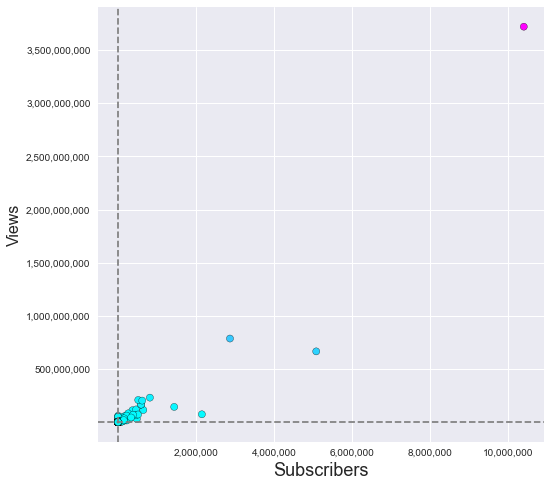

In [323]:
# Scatter plot
# plotting the number of subscribers of a channel with it's total views
plt.xlabel('Subscribers', fontsize=18)
plt.ylabel('Views', fontsize=16)
plt.style.use('seaborn')
plt.axvline(0,c=(0.5,0.5,0.5), ls='--')
plt.axhline(0,c=(0.5,0.5,0.5), ls='--')
plt.rcParams['figure.figsize'] = [8, 8]
plt.yticks([500000000,1000000000,1500000000,2000000000,2500000000,3000000000,3500000000],
           ['500,000,000','1,000,000,000','1,500,000,000','2,000,000,000','2,500,000,000','3,000,000,000','3,500,000,000'])
plt.xticks([2000000,4000000,6000000,8000000,10000000],['2,000,000','4,000,000','6,000,000','8,000,000','10,000,000'])
plt.scatter(df['Subscribers'],df['Views'], s=50,c=df['Views'], cmap='cool', edgecolor='k')

plt.show()

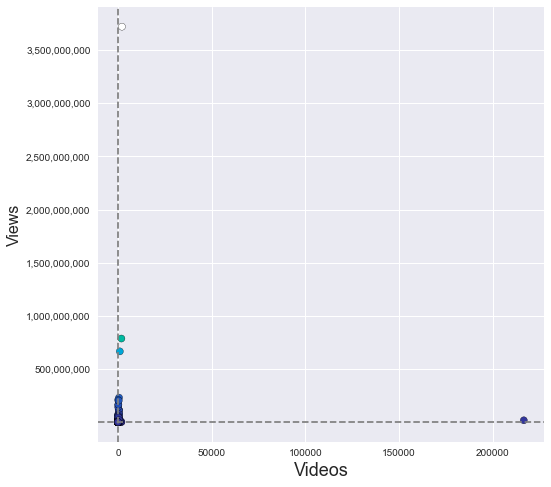

In [324]:
# Scatter plot
# plotting the number of videos of a channel with it's total views
plt.xlabel('Videos', fontsize=18)
plt.ylabel('Views', fontsize=16)
plt.style.use('seaborn')
plt.axvline(0,c=(0.5,0.5,0.5), ls='--')
plt.axhline(0,c=(0.5,0.5,0.5), ls='--')
plt.rcParams['figure.figsize'] = [8, 8]
plt.yticks([500000000,1000000000,1500000000,2000000000,2500000000,3000000000,3500000000],
           ['500,000,000','1,000,000,000','1,500,000,000','2,000,000,000','2,500,000,000','3,000,000,000','3,500,000,000'])

plt.scatter(df['Videos'],df['Views'], s=50,  c=df['Views'], cmap='terrain', edgecolor='k')

plt.show()

the above graphs contain multiple outliers that obscure the overall graph

# Filtering and Removing outliers
the few outliers in the data set are obscuring the graphed results
so I will remove them based on the standard deviation and zscores of
the data sets values

In [325]:
# removing outliers from data
df_filtered = df[(np.abs(stats.zscore(df['Views'])) < 3)]
df_filtered = df_filtered[(np.abs(stats.zscore(df_filtered['Videos'])) < 3)]
df_filtered = df_filtered[(np.abs(stats.zscore(df_filtered['Subscribers'])) < 3)]
print(len(df) - len(df_filtered), ' outliers removed')

13  outliers removed


# Graphing the data again without the outliers

# Views against Subscribers

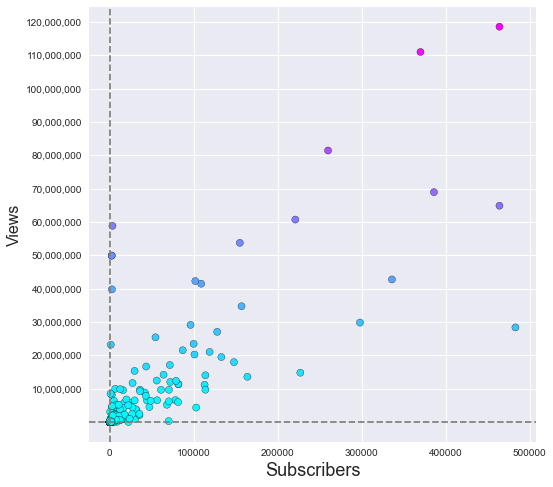

In [326]:
# Scatter plot
# plotting the number of subscribers of a channel with it's total views
plt.xlabel('Subscribers', fontsize=18)
plt.ylabel('Views', fontsize=16)
plt.style.use('seaborn')
plt.axvline(0,c=(0.5,0.5,0.5), ls='--')
plt.axhline(0,c=(0.5,0.5,0.5), ls='--')
plt.rcParams['figure.figsize'] = [8, 8]
plt.yticks([10000000,20000000,30000000,40000000,50000000,60000000,70000000,80000000,90000000,100000000,110000000,120000000],
           ['10,000,000','20,000,000','30,000,000','40,000,000','50,000,000','60,000,000','70,000,000','80,000,000','90,000,000',
            '100,000,000','110,000,000','120,000,000'])
plt.scatter(df_filtered['Subscribers'],df_filtered['Views'], s=50,c=df_filtered['Views'], cmap='cool', edgecolor='k')

plt.show()

from the scatter plot above we can see a clear linear correlation between the views a channel has and the amount of subscribers it has, the more subscribers, the more views, however there are still multiple channels with little to none subscribers that have large amounts of views, I think this may be down to some channels having lucky viral videos that hit 10s of millions of views even when the channel has no dedicated following

# Views against Videos

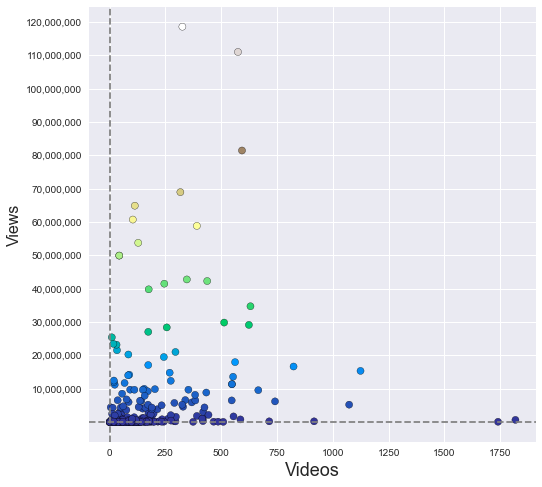

In [327]:
# Scatter plot
# plotting the number of videos of a channel with it's total views
plt.xlabel('Videos', fontsize=18)
plt.ylabel('Views', fontsize=16)
plt.style.use('seaborn')
plt.axvline(0,c=(0.5,0.5,0.5), ls='--')
plt.axhline(0,c=(0.5,0.5,0.5), ls='--')
plt.rcParams['figure.figsize'] = [8, 8]
plt.yticks([10000000,20000000,30000000,40000000,50000000,60000000,70000000,80000000,90000000,100000000,110000000,120000000],
           ['10,000,000','20,000,000','30,000,000','40,000,000','50,000,000','60,000,000','70,000,000','80,000,000','90,000,000',
            '100,000,000','110,000,000','120,000,000'])

plt.scatter(df_filtered['Videos'],df_filtered['Views'], s=50,  c=df_filtered['Views'], cmap='terrain', edgecolor='k')

plt.show()

the scatter plot above does not show any strong correlation between view count and video count of a channel, having more videos does not necessarily mean the channel will recieve more views

# Top channels by each category
for this comparison I am using the data with it's outliers to accurately see the massive difference in channel statistics 

# Top 5 viewed channels

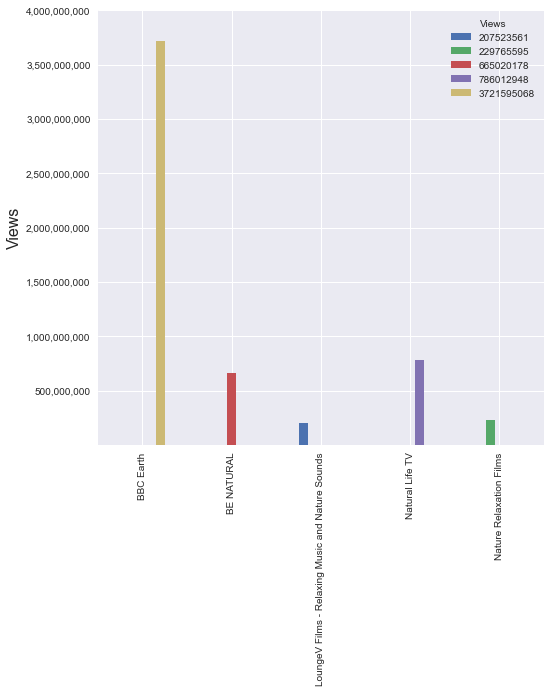

,Names,Subscribers,Views,Videos,id,Date
312,LoungeV Films - Relaxing Music and Nature Sounds,518000,207523561,77,UCyupwg56cb-DKlz8fg09Vbw,2011-05-30
7,Nature Relaxation Films,818000,229765595,552,UC4lp9Emg1ci8eo2eDkB-Tag,2006-08-26
280,BE NATURAL,5080000,665020178,983,UCMDPvpD-R1_isb1o0ua15ig,2017-05-09
230,Natural Life TV,2870000,786012948,1818,UCwbXPUMNQwUGCG_nCkAq3uA,2016-08-25
205,BBC Earth,10400000,3721595068,2110,UCwmZiChSryoWQCZMIQezgTg,2009-02-25


In [328]:
# dataframe sorted from views
df_viewSorted = df.sort_values(by=['Views'])
top5 = df_viewSorted.tail()
top5.pivot(index='Names', columns='Views', values='Views').plot(kind='bar')
plt.xlabel('', fontsize=18)
plt.ylabel('Views', fontsize=16)
plt.style.use('seaborn')
plt.yticks([500000000,1000000000,1500000000,2000000000,2500000000,3000000000,3500000000,4000000000],
           ['500,000,000','1,000,000,000','1,500,000,000','2,000,000,000','2,500,000,000','3,000,000,000',
            '3,500,000,000','4,000,000,000'])
#top 5 channels
plt.show()
top5

# Top 5 subscribed channels

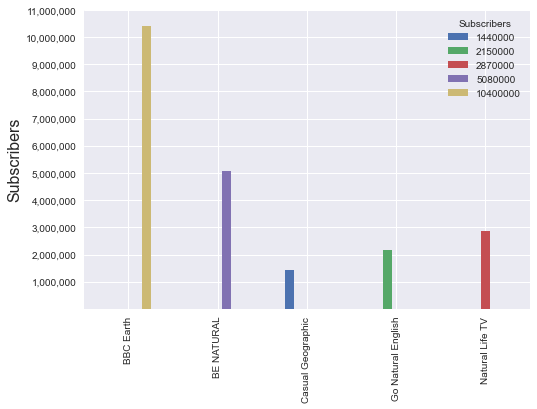

,Names,Subscribers,Views,Videos,id,Date
203,Casual Geographic,1440000,142369961,76,UC5Yo88QF-chdugJbAnB2tUw,2020-08-01
233,Go Natural English,2150000,72980781,607,UC9Pbt3q-ihROg1lmmmQdU2w,2011-04-12
230,Natural Life TV,2870000,786012948,1818,UCwbXPUMNQwUGCG_nCkAq3uA,2016-08-25
280,BE NATURAL,5080000,665020178,983,UCMDPvpD-R1_isb1o0ua15ig,2017-05-09
205,BBC Earth,10400000,3721595068,2110,UCwmZiChSryoWQCZMIQezgTg,2009-02-25


In [329]:
# dataframe sorted from subscribers
df_subSorted = df.sort_values(by=['Subscribers'])
top5 = df_subSorted.tail()
top5.pivot(index='Names', columns='Subscribers', values='Subscribers').plot(kind='bar')
plt.xlabel('', fontsize=18)
plt.ylabel('Subscribers', fontsize=16)
plt.style.use('seaborn')
plt.yticks([1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000,11000000],
           ['1,000,000','2,000,000','3,000,000','4,000,000','5,000,000','6,000,000','7,000,000','8,000,000',
            '9,000,000','10,000,000','11,000,000'])
#top 5 channels
plt.show()
top5

# Top 5 channels by video count

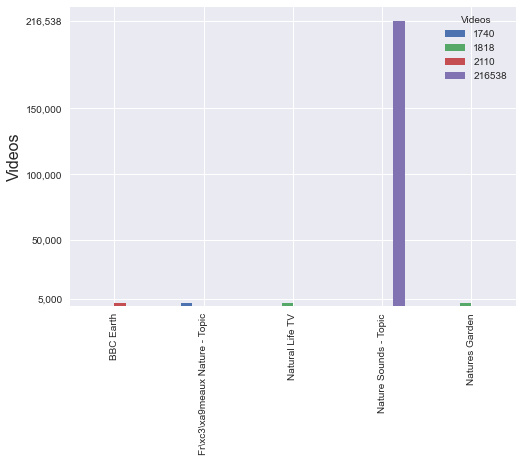

,Names,Subscribers,Views,Videos,id,Date
229,Fr\xc3\xa9meaux Nature - Topic,171,69644,1740,UCUv02exIWsH2H1WwRjvkj-A,2015-09-18
230,Natural Life TV,2870000,786012948,1818,UCwbXPUMNQwUGCG_nCkAq3uA,2016-08-25
165,Natures Garden,13600,642762,1818,UCRZG9MMIrjsYrcZQ5Pjn1xw,2006-11-30
205,BBC Earth,10400000,3721595068,2110,UCwmZiChSryoWQCZMIQezgTg,2009-02-25
325,Nature Sounds - Topic,9670,16421501,216538,UCyfzggiXvfMdKlK7YdH_GIA,2015-09-18


In [330]:
# dataframe sorted from videos
df_videosSorted = df.sort_values(by=['Videos'])
top5 = df_videosSorted.tail()
top5.pivot(index='Names', columns='Videos', values='Videos').plot(kind='bar')
plt.xlabel('', fontsize=18)
plt.ylabel('Videos', fontsize=16)
plt.style.use('seaborn')
plt.yticks([5000,50000,100000,150000,216538],['5,000','50,000','100,000','150,000','216,538'])
#top 5 channels
plt.show()
top5

from the 3 bar charts above we can see that BBC Earth is in the top 5 of all 3 categories, meaning it has a mix of high video and subscriber counts leading to a successful channel with a high view count

# Calculating channel lifetime
using the birth date of each channel to calculate the time in months from birth to present

In [331]:
#calculating date from present in months
currentYear=now.year
dateMonths=[]
for x in df_filtered['Date']:
    date = str(x)
    while len(date) > 10:
        date = date[:-1]
    
    # cutting down the date to just its year
    year = date[:-6]
    
    # calculating years since birth, multiplied by 12 to get months
    date2 = int((currentYear - int(year))*12)
    
    # cutting down the date to just its month
    month = date[5:-3]
    
    # calculating total months difference
    date2 = str(date2 + int(now.month-int(month)))
    dateMonths.append(date2)


# Scatter plot graphing results
using the filtered data set

# Subscribers against Lifetime

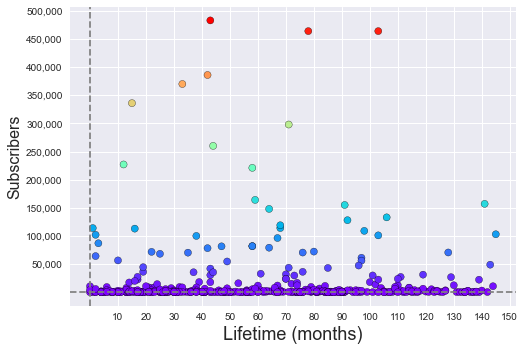

In [332]:
# Scatter plot
# plotting the number of subscribers of a channel with it's total views
plt.xlabel('Lifetime (months)', fontsize=18)
plt.ylabel('Subscribers', fontsize=16)
plt.style.use('seaborn')
plt.axvline(0,c=(0.5,0.5,0.5), ls='--')
plt.axhline(0,c=(0.5,0.5,0.5), ls='--')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150],[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
plt.yticks([50000,100000,150000,200000,250000,300000,350000,400000,450000,500000],
           ['50,000','100,000','150,000','200,000','250,000','300,000','350,000','400,000','450,000','500,000'])

plt.scatter(dateMonths,df_filtered['Subscribers'], s=50,c=df_filtered['Subscribers'], cmap='rainbow', edgecolor='k')

plt.show()

# Views against Lifetime

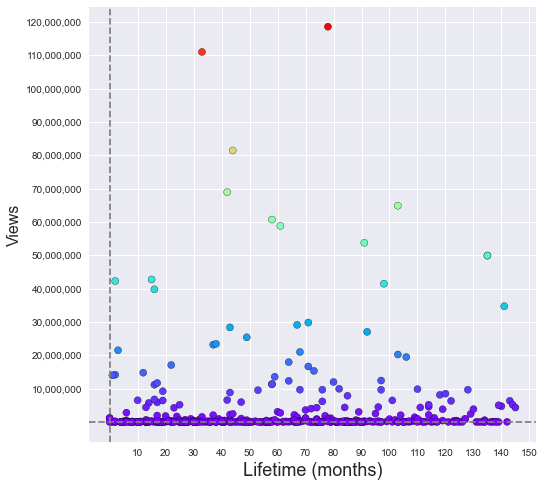

In [333]:
# Scatter plot
# plotting the number of subscribers of a channel with it's total views
plt.xlabel('Lifetime (months)', fontsize=18)
plt.ylabel('Views', fontsize=16)
plt.style.use('seaborn')
plt.axvline(0,c=(0.5,0.5,0.5), ls='--')
plt.axhline(0,c=(0.5,0.5,0.5), ls='--')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150],[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
plt.yticks([10000000,20000000,30000000,40000000,50000000,60000000,70000000,80000000,90000000,100000000,110000000,120000000],
           ['10,000,000','20,000,000','30,000,000','40,000,000','50,000,000','60,000,000','70,000,000','80,000,000',
            '90,000,000','100,000,000','110,000,000','120,000,000'])

plt.scatter(dateMonths,df_filtered['Views'], s=50,c=df_filtered['Views'], cmap='rainbow', edgecolor='k')

plt.show()

both scatter plot graphs above seem to indicate that the views and subscriber count are not linked to the lifetime of a channel, meaning newer channels have just as much oppurtunity as the older channels to gain views and followers

# Conclusion
in this assignment we looked at the connections between the subscribers, views, video count, and lifetime of channels in the dataset. There is a clear connection between the views of a channel and the amount of subscribers it has, the video count and lifetime do not appear to have an effect on a channels views and growth.

One big challenge with the Youtube api has to be it's quota for a day, the api only allows you to request a finite amount of data from youtube per day, this is capped at 10,000, with each request usually using 1 - 2 units each request. However, this can add up when using a 'for' loop to request 100s/1000s of times. Multiple days while testing my task 1, I exceeded my quota for the day and had to stop working until the next day.

Future analysis
- The analysis could be extended to a larger number of channels with multiple different search categories, comparing the views between different categories.
- Data from the top video of each channel such as likes, dislikes and comment count could be collected, seeing how many of the channels with low subscribers have 'viral' videos
- the keywords of each channel could be collected and compared with other channels to find common keywords between channels